In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df=pd.read_excel("customer data.xlsx")

In [106]:
df.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

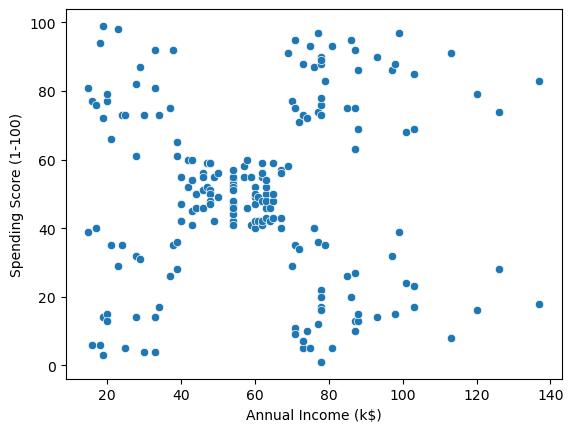

In [107]:
#plot the scatter plot and analyze the data points
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])
plt.show()

In [108]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_scale=ss.fit_transform(df)

In [109]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
wcss=[]
for i in range(2,11):

    km=KMeans(n_clusters=i)
    km.fit(df_scale)

    wcss.append(km.inertia_)

In [110]:
wcss

[271.7037332940275,
 157.70400815035947,
 108.92131661364355,
 65.57885579985049,
 57.31985017610484,
 49.97805051988058,
 39.50280602445726,
 39.781007406895824,
 29.802432945605325]

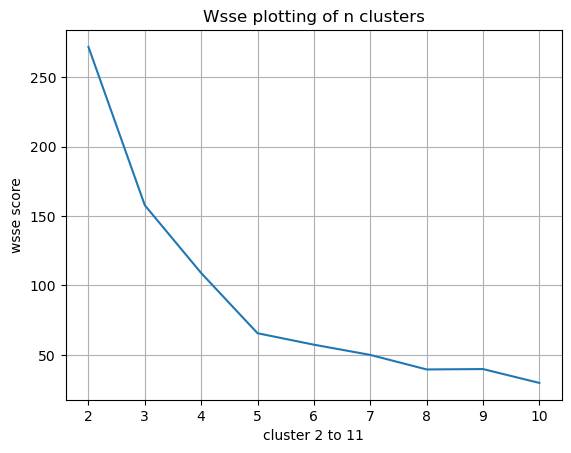

In [111]:
plt.title('Wsse plotting of n clusters')
plt.xlabel('cluster 2 to 11')
plt.ylabel('wsse score')
plt.plot(range(2,11),wcss)
plt.grid(True)
plt.show()

In [112]:
df['kmeans cluster']=km.predict(df_scale)

In [113]:
df

,Annual Income (k$),Spending Score (1-100),kmeans cluster
0,15,39,1
1,15,81,3
2,16,6,7
3,16,77,3
4,17,40,1
...,...,...,...
195,120,79,6
196,126,28,0
197,126,74,6
198,137,18,0


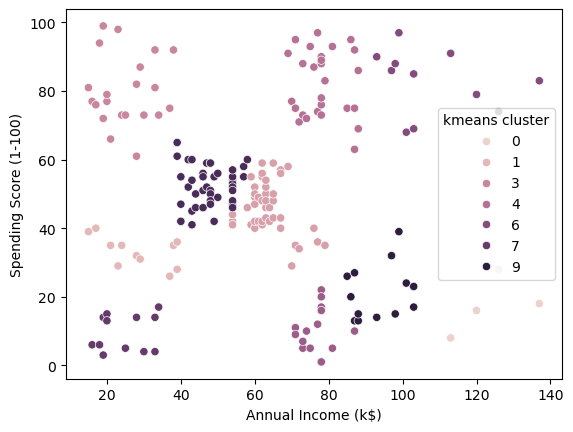

In [114]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='kmeans cluster')
plt.show()

In [115]:
km=KMeans(n_clusters=5)
km.fit(df_scale)

KMeans(n_clusters=5)

In [116]:
df['clusters']=km.predict(df_scale)

In [117]:
df

,Annual Income (k$),Spending Score (1-100),kmeans cluster,clusters
0,15,39,1,4
1,15,81,3,0
2,16,6,7,4
3,16,77,3,0
4,17,40,1,4
...,...,...,...,...
195,120,79,6,2
196,126,28,0,1
197,126,74,6,2
198,137,18,0,1


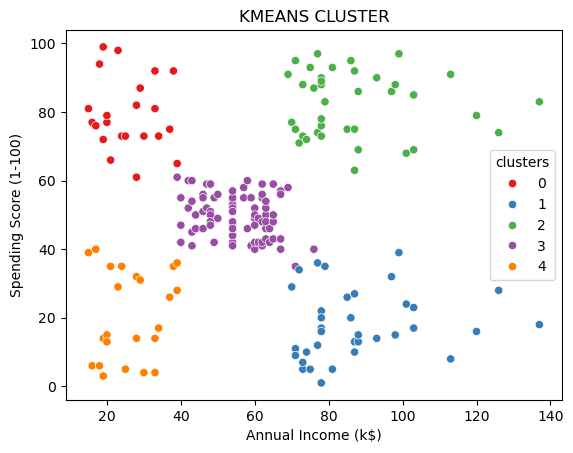

In [118]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df['clusters'],palette='Set1')
plt.title('KMEANS CLUSTER')
plt.show()

In [119]:
df['clusters']=df['clusters'].map({1:'Standard',0:'Sensible',2:'Target',3:'careless',4:'careful'})

In [120]:
df

,Annual Income (k$),Spending Score (1-100),kmeans cluster,clusters
0,15,39,1,careful
1,15,81,3,Sensible
2,16,6,7,careful
3,16,77,3,Sensible
4,17,40,1,careful
...,...,...,...,...
195,120,79,6,Target
196,126,28,0,Standard
197,126,74,6,Target
198,137,18,0,Standard


In [121]:
#hierarchiecal/aglomerative clustering
from scipy.cluster.hierarchy import dendrogram,linkage

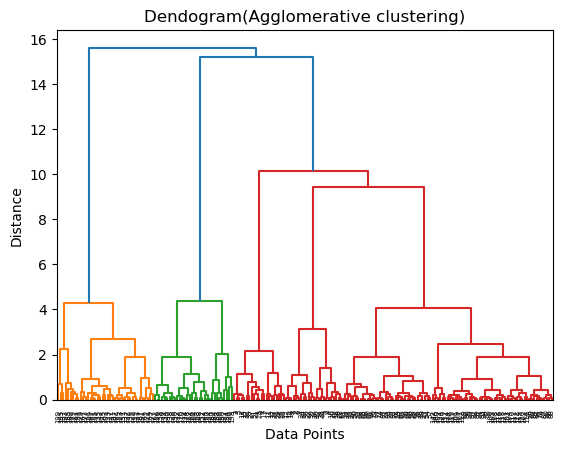

In [122]:
plt.Figure(figsize=(10,6))
linked=linkage(df_scale,method='ward')
dendrogram(linked)
plt.title('Dendogram(Agglomerative clustering)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [123]:
from sklearn.cluster import AgglomerativeClustering
agc=AgglomerativeClustering(n_clusters=5)
df['aglomerative cluster']=agc.fit_predict(df_scale)



In [124]:
df

,Annual Income (k$),Spending Score (1-100),kmeans cluster,clusters,aglomerative cluster
0,15,39,1,careful,4
1,15,81,3,Sensible,3
2,16,6,7,careful,4
3,16,77,3,Sensible,3
4,17,40,1,careful,4
...,...,...,...,...,...
195,120,79,6,Target,1
196,126,28,0,Standard,0
197,126,74,6,Target,1
198,137,18,0,Standard,0


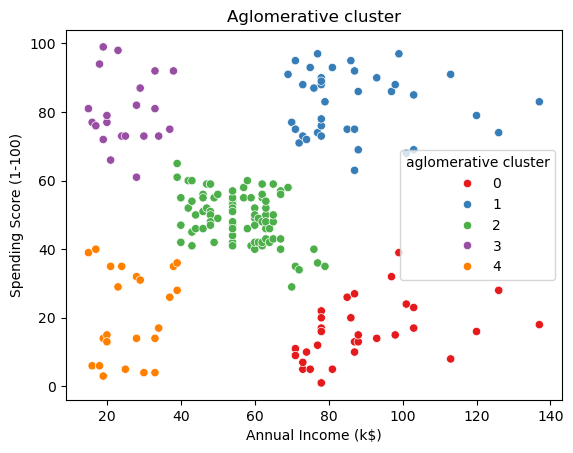

In [125]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df['aglomerative cluster'],palette='Set1')
plt.title('Aglomerative cluster')
plt.show()

In [126]:
#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


In [127]:
ne=NearestNeighbors(n_neighbors=4)

In [128]:
ne_fit=ne.fit(df_scale[::3])
distances,indices=ne_fit.kneighbors(df_scale)


In [129]:
ne_fit

NearestNeighbors(n_neighbors=4)

In [130]:
distances=np.sort(distances[:,3])

In [131]:
distances

array([0.11450829, 0.11646468, 0.12091014, 0.13834957, 0.13834957,
       0.13925388, 0.15753602, 0.16332841, 0.16332841, 0.16332841,
       0.16332841, 0.16332841, 0.16332841, 0.16332841, 0.17128613,
       0.17128613, 0.17303595, 0.19084715, 0.19084715, 0.19202736,
       0.19202736, 0.19294031, 0.1941078 , 0.1941078 , 0.1941078 ,
       0.19475561, 0.19475561, 0.19782504, 0.19782504, 0.19782504,
       0.19782504, 0.19782504, 0.19782504, 0.19782504, 0.19782504,
       0.20603662, 0.20603662, 0.20857963, 0.20857963, 0.20857963,
       0.20857963, 0.20857963, 0.21777122, 0.21777122, 0.21777122,
       0.21777122, 0.22357696, 0.22357696, 0.22357696, 0.22357696,
       0.22357696, 0.22536634, 0.22536634, 0.22901658, 0.23228367,
       0.23228367, 0.23292936, 0.236036  , 0.236036  , 0.236036  ,
       0.236036  , 0.24182028, 0.24182028, 0.24511979, 0.24511979,
       0.24695814, 0.24695814, 0.24695814, 0.24695814, 0.267186  ,
       0.26999162, 0.26999162, 0.27175092, 0.27441842, 0.27441

In [132]:
indices

array([[ 0,  6, 14,  4],
       [ 1,  5,  3,  7],
       [ 2,  4, 10,  8],
       [ 1,  5,  3,  7],
       [ 0,  6, 14, 16],
       [ 1,  5,  3,  7],
       [ 2,  4, 10,  8],
       [11,  5,  1,  7],
       [ 2, 10,  4,  8],
       [ 3,  7,  1,  5],
       [ 4,  2,  8, 10],
       [11,  5,  1,  7],
       [ 4,  8,  2, 12],
       [ 5,  1,  3,  7],
       [ 4,  2,  8, 10],
       [ 5,  1,  3,  7],
       [ 6,  0, 14, 16],
       [ 3,  7,  9,  1],
       [ 6,  0,  4,  8],
       [11,  5,  1,  7],
       [ 6,  0, 14, 16],
       [ 7,  3,  5,  1],
       [10,  2,  8,  4],
       [ 7,  3,  5,  1],
       [ 8, 12,  4, 10],
       [ 5,  7, 11, 13],
       [ 6, 14,  0, 16],
       [ 9, 15,  7, 17],
       [ 6, 14, 12, 16],
       [11,  5, 13,  7],
       [10,  8,  2, 12],
       [ 7, 13,  3,  5],
       [10,  8, 12,  2],
       [11, 13,  5,  7],
       [12,  8, 10,  4],
       [13, 11,  7,  5],
       [12,  8, 10,  4],
       [13, 15,  7,  9],
       [12, 14,  6,  8],
       [13, 15,  7, 17],


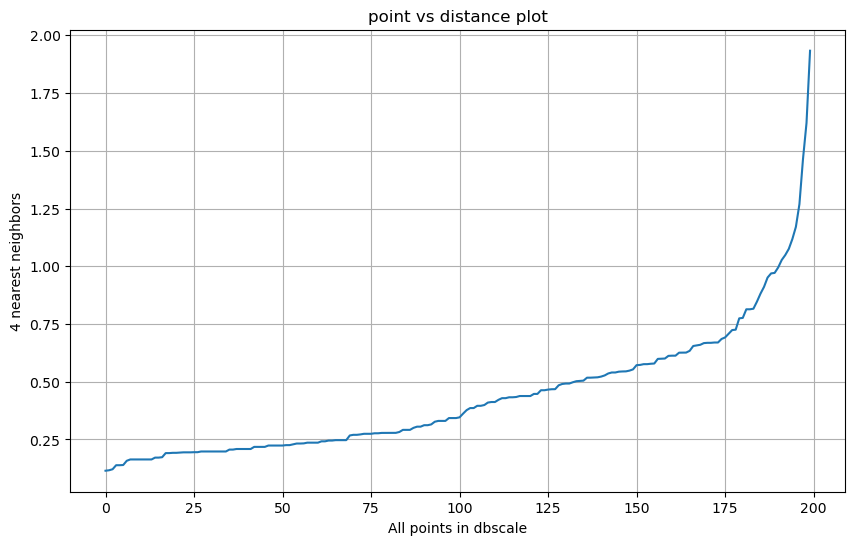

In [133]:
##shows the distance of each point to its 4th nearest plot
#understanding=graph starts flat that means most of the datapoints have small or similar distance to its 4th nearest neighbors.
#arount 175 points,the distance begins to rise sharply meaning that points beyong this are further from their neighbor.
plt.figure(figsize=(10,6))
plt.xlabel('All points in dbscale')
plt.title('point vs distance plot')
plt.ylabel('4 nearest neighbors')
plt.plot(distances)
plt.grid(True)
plt.show()

In [134]:
dbscan=DBSCAN(eps=0.4)

In [135]:
df['DBSCAN cluster']=dbscan.fit_predict(df_scale)

In [136]:
df.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)', 'kmeans cluster',
       'clusters', 'aglomerative cluster', 'DBSCAN cluster'],
      dtype='object')

<Axes: title={'center': 'dbscan clustering'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

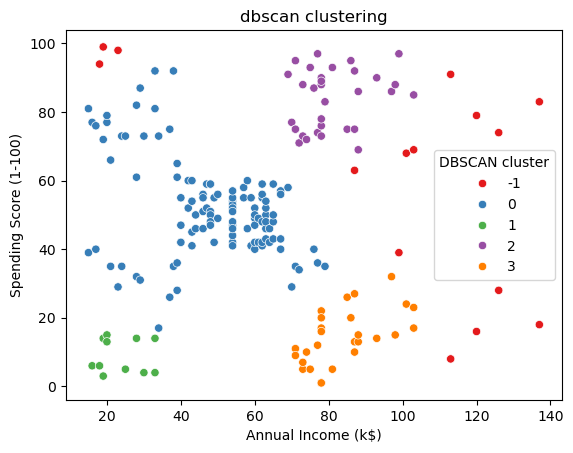

In [137]:
plt.title('dbscan clustering')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='DBSCAN cluster',palette='Set1')

Feature               K-Means          Hierarchiecal       DBSCAN

Need To Choose K        Yes                Yes             No
Shape of cluster       Round              Tree            any shape 
Can detect noise        no                  no               Yes
Scaling                 Yes                yes              yes
Graph that helped    Elbow methos       dendogram       nearest neighbors

